In [979]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from pathlib import Path
import yfinance as yf
from pandas_datareader import data as pdr

In [980]:
#paths
csv_path = Path() / "csv"
plots_path = Path() / "plots"

In [981]:
df = pd.read_csv(csv_path / 'lego_to_be_cleaned.csv')

CSV cleaning

In [982]:
df = df.drop(['Subtheme', 'Paid', 'Growth', 'Condition', 'Date', 'Notes', 'Collection', 'Status', 'URL'], axis='columns')

In [983]:
df.columns = [col.lower() for col in df.columns]
df.rename(columns={'releaseddate': 'released_date'}, inplace=True)
df.rename(columns={'retireddate': 'retired_date'}, inplace=True)

df

,number,name,theme,year,pieces,minifigs,availability,retired,released_date,retired_date,retail,value
0,75144-1,Snowspeeder,Star Wars,2017,1703,2,Exclusive,True,05/05/2017,15/01/2019,199;99 €,330;40 €
1,10251-1,Brick Bank,Icons,2016,2380,6,RetailLimited,True,02/01/2016,14/11/2018,149;99 €,494;81 €
2,10252-1,Volkswagen Beetle,Icons,2016,1167,0,Exclusive,True,01/08/2016,03/12/2020,89;99 €,113;14 €
3,10253-1,Big Ben,Icons,2016,4163,0,Exclusive,True,02/07/2016,25/11/2018,219;99 €,327;12 €
4,10702-1,Creative Building Set,Classic,2016,583,0,Retail,True,02/01/2016,24/11/2017,24;99 €,30;14 €
...,...,...,...,...,...,...,...,...,...,...,...,...
17614,662403-1,Zombie with Burning Baby Zombie and TNT,Minecraft,2024,12,2,Promotional,True,01/01/2024,01/02/2024,0;00 €,4;73 €
17615,9790-1,ROBOLAB Team Challenge Set,Education,1999,725,0,Retail,True,01/01/1999,01/01/2001,175;99 €,193;78 €
17616,2000443-1,Workshop Kit Freewheeler,Education,2015,82,1,RetailLimited,True,01/01/2015,01/01/2017,8;79 €,11;00 €
17617,2000442-1,Workshop Kit Spinning Top,Education,2015,10,0,Retail,True,01/01/2015,01/01/2017,8;79 €,23;77 €


In [984]:
# Check for missing values in the dataframe
df.isnull().sum()

number            0
name              1
theme             0
year              0
pieces            0
minifigs          0
availability      0
retired           0
released_date    19
retired_date     15
retail            0
value             0
dtype: int64

In [985]:
# Function to clean and convert currency values
def clean_currency(value):
    try:
        # Remove the currency symbol and replace ';' with '.'
        value = value.replace('€', '').replace(';', '.').strip()
        # Convert to float
        return float(value)
    except ValueError:
        # Return None if conversion is not possible
        return None

# Apply the function to the 'retail' and 'value' columns
df['retail'] = df['retail'].apply(clean_currency)
df['value'] = df['value'].apply(clean_currency)

# Drop rows where conversion to float was not possible
df = df.dropna(subset=['retail', 'value'])

df

,number,name,theme,year,pieces,minifigs,availability,retired,released_date,retired_date,retail,value
0,75144-1,Snowspeeder,Star Wars,2017,1703,2,Exclusive,True,05/05/2017,15/01/2019,199.99,330.40
1,10251-1,Brick Bank,Icons,2016,2380,6,RetailLimited,True,02/01/2016,14/11/2018,149.99,494.81
2,10252-1,Volkswagen Beetle,Icons,2016,1167,0,Exclusive,True,01/08/2016,03/12/2020,89.99,113.14
3,10253-1,Big Ben,Icons,2016,4163,0,Exclusive,True,02/07/2016,25/11/2018,219.99,327.12
4,10702-1,Creative Building Set,Classic,2016,583,0,Retail,True,02/01/2016,24/11/2017,24.99,30.14
...,...,...,...,...,...,...,...,...,...,...,...,...
17614,662403-1,Zombie with Burning Baby Zombie and TNT,Minecraft,2024,12,2,Promotional,True,01/01/2024,01/02/2024,0.00,4.73
17615,9790-1,ROBOLAB Team Challenge Set,Education,1999,725,0,Retail,True,01/01/1999,01/01/2001,175.99,193.78
17616,2000443-1,Workshop Kit Freewheeler,Education,2015,82,1,RetailLimited,True,01/01/2015,01/01/2017,8.79,11.00
17617,2000442-1,Workshop Kit Spinning Top,Education,2015,10,0,Retail,True,01/01/2015,01/01/2017,8.79,23.77


In [986]:
# Function to convert date format and handle invalid dates
def convert_date_format(date_str):
    try:
        return pd.to_datetime(date_str, format="%d/%m/%Y")
    except ValueError:
        return pd.NaT

# Apply the function to the date columns using .loc to avoid the SettingWithCopyWarning
df.loc[:, 'released_date'] = df['released_date'].apply(convert_date_format)
df.loc[:, 'retired_date'] = df['retired_date'].apply(convert_date_format)

# Remove rows with invalid dates
df = df.dropna(subset=['released_date', 'retired_date'])

In [987]:
df = df.reset_index(drop=True)

df

,number,name,theme,year,pieces,minifigs,availability,retired,released_date,retired_date,retail,value
0,75144-1,Snowspeeder,Star Wars,2017,1703,2,Exclusive,True,2017-05-05 00:00:00,2019-01-15 00:00:00,199.99,330.40
1,10251-1,Brick Bank,Icons,2016,2380,6,RetailLimited,True,2016-01-02 00:00:00,2018-11-14 00:00:00,149.99,494.81
2,10252-1,Volkswagen Beetle,Icons,2016,1167,0,Exclusive,True,2016-08-01 00:00:00,2020-12-03 00:00:00,89.99,113.14
3,10253-1,Big Ben,Icons,2016,4163,0,Exclusive,True,2016-07-02 00:00:00,2018-11-25 00:00:00,219.99,327.12
4,10702-1,Creative Building Set,Classic,2016,583,0,Retail,True,2016-01-02 00:00:00,2017-11-24 00:00:00,24.99,30.14
...,...,...,...,...,...,...,...,...,...,...,...,...
17305,662403-1,Zombie with Burning Baby Zombie and TNT,Minecraft,2024,12,2,Promotional,True,2024-01-01 00:00:00,2024-02-01 00:00:00,0.00,4.73
17306,9790-1,ROBOLAB Team Challenge Set,Education,1999,725,0,Retail,True,1999-01-01 00:00:00,2001-01-01 00:00:00,175.99,193.78
17307,2000443-1,Workshop Kit Freewheeler,Education,2015,82,1,RetailLimited,True,2015-01-01 00:00:00,2017-01-01 00:00:00,8.79,11.00
17308,2000442-1,Workshop Kit Spinning Top,Education,2015,10,0,Retail,True,2015-01-01 00:00:00,2017-01-01 00:00:00,8.79,23.77


In [988]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17310 entries, 0 to 17309
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   number         17310 non-null  object 
 1   name           17309 non-null  object 
 2   theme          17310 non-null  object 
 3   year           17310 non-null  int64  
 4   pieces         17310 non-null  int64  
 5   minifigs       17310 non-null  int64  
 6   availability   17310 non-null  object 
 7   retired        17310 non-null  bool   
 8   released_date  17310 non-null  object 
 9   retired_date   17310 non-null  object 
 10  retail         17310 non-null  float64
 11  value          17310 non-null  float64
dtypes: bool(1), float64(2), int64(3), object(6)
memory usage: 1.5+ MB


data filtering

In [989]:
#filer database
df = df[(df['year'] >= 1980) & (df['year'] <= 2022)]
df = df[(df['pieces'] != 0)]
df = df[(df['retail'] != 0)]
df = df[(df['retired'] == True)]

#reset index (number rows ascending)
df = df.reset_index(drop=True)

In [990]:
df.to_csv(csv_path / 'brickeconomy_new.csv')

HPR/APR

In [991]:
#create new columns (HPR, HPY, APR)
df['HPR'] = (df['value'] - df['retail']) / df['retail']
df['APR'] = ((df['HPR'] + 1) ** (1/(2024 - df['year']))) - 1

df

,number,name,theme,year,pieces,minifigs,availability,retired,released_date,retired_date,retail,value,HPR,APR
0,75144-1,Snowspeeder,Star Wars,2017,1703,2,Exclusive,True,2017-05-05 00:00:00,2019-01-15 00:00:00,199.99,330.40,0.652083,0.074354
1,10251-1,Brick Bank,Icons,2016,2380,6,RetailLimited,True,2016-01-02 00:00:00,2018-11-14 00:00:00,149.99,494.81,2.298953,0.160906
2,10252-1,Volkswagen Beetle,Icons,2016,1167,0,Exclusive,True,2016-08-01 00:00:00,2020-12-03 00:00:00,89.99,113.14,0.257251,0.029029
3,10253-1,Big Ben,Icons,2016,4163,0,Exclusive,True,2016-07-02 00:00:00,2018-11-25 00:00:00,219.99,327.12,0.486977,0.050843
4,10702-1,Creative Building Set,Classic,2016,583,0,Retail,True,2016-01-02 00:00:00,2017-11-24 00:00:00,24.99,30.14,0.206082,0.023699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10774,45809-1,City Shaper Challenge Kit,Education,2019,2238,1,Retail,True,2019-01-01 00:00:00,2021-01-01 00:00:00,175.99,338.05,0.920848,0.139459
10775,10659-2,Vehicle Suitcase,Juniors,2014,146,2,Retail,True,2014-01-01 00:00:00,2016-01-01 00:00:00,21.99,43.07,0.958618,0.069535
10776,9790-1,ROBOLAB Team Challenge Set,Education,1999,725,0,Retail,True,1999-01-01 00:00:00,2001-01-01 00:00:00,175.99,193.78,0.101085,0.003859
10777,2000443-1,Workshop Kit Freewheeler,Education,2015,82,1,RetailLimited,True,2015-01-01 00:00:00,2017-01-01 00:00:00,8.79,11.00,0.251422,0.025233


In [992]:
#average APR per year
APR_yearly = df.groupby("year").mean('APR')
print(APR_yearly['APR'])

year
1980    0.051638
1981    0.075771
1982    0.060581
1983    0.076033
1984    0.074955
1985    0.080231
1986    0.069071
1987    0.059438
1988    0.082901
1989    0.065710
1990    0.067032
1991    0.067354
1992    0.072833
1993    0.064278
1994    0.070992
1995    0.060711
1996    0.062655
1997    0.063006
1998    0.059979
1999    0.066099
2000    0.057826
2001    0.072596
2002    0.070928
2003    0.072588
2004    0.078661
2005    0.083702
2006    0.089316
2007    0.087703
2008    0.092005
2009    0.084479
2010    0.080362
2011    0.088597
2012    0.095290
2013    0.085439
2014    0.095430
2015    0.091807
2016    0.095299
2017    0.092497
2018    0.085203
2019    0.077515
2020    0.082867
2021    0.090082
2022    0.104910
Name: APR, dtype: float64


In [993]:
APR_mean = round(df['APR'].mean(), 6)
APR_mean

0.081777

In [994]:
APR_by_themes = df.groupby("theme").mean('APR')
APR_by_themes = APR_by_themes.sort_values("APR", ascending=False)
APR_by_themes['APR']

theme
FORMA                        0.379361
BrickLink                    0.327697
Avatar The Last Airbender    0.183646
Mixels                       0.161662
BrickHeadz                   0.157204
                               ...   
DC Super Hero Girls          0.012488
LEGO Art                     0.012355
Trolls World Tour            0.003972
Horizon                     -0.062813
Avatar                      -0.097147
Name: APR, Length: 143, dtype: float64

In [995]:
# Assuming df is your DataFrame and it has two columns: 'num_elements' and 'annual_return'
df['group'] = pd.cut(df['pieces'], bins=[0, 500, 1000, float('inf')], labels=['small', 'medium', 'big'])

# Calculate the average annual return for each group
grouped = df.groupby('group')['APR'].mean()

# Print the most profitable group
round(grouped, 3)

/var/folders/1k/rsc6z_156_36hpxhr9fbzsch0000gn/T/ipykernel_9454/1755315732.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('group')['APR'].mean()


group
small     0.085
medium    0.064
big       0.059
Name: APR, dtype: float64

In [996]:
#highest APR values
df.sort_values("APR", ascending=False).head(10)

,number,name,theme,year,pieces,minifigs,availability,retired,released_date,retired_date,retail,value,HPR,APR,group
10384,6385891-1,Brick Lab,Promotional,2021,145,0,Exclusive,True,2021-01-01 00:00:00,2023-01-01 00:00:00,13.20,140.42,9.637879,1.199303,small
10619,71033-5,Kermit the Frog,Minifigure Series,2022,5,1,Retail,True,2022-05-01 00:00:00,2023-01-25 00:00:00,3.99,17.35,3.348371,1.085275,small
9268,853922-1,Creative Rings,Friends,2019,43,0,ExclusiveLEGOLAND,True,2019-01-01 00:00:00,2021-01-01 00:00:00,7.91,229.92,28.067004,0.961914,small
10357,10282-2,Adidas Originals Superstar X Footshop,Icons,2021,974,0,RetailLimited,True,2021-09-02 00:00:00,2023-09-02 00:00:00,89.99,632.67,6.030448,0.915701,medium
10392,43108-4,Dragon Guitarist,Vidiyo,2021,13,1,Retail,True,2021-11-01 00:00:00,2021-12-01 00:00:00,4.99,31.41,5.294589,0.846386,small
9696,77902-1,Captain Marvel and the Asis,Marvel Super Heroes,2019,271,2,Retail,True,2019-07-20 00:00:00,2019-07-20 00:00:00,39.60,826.53,19.871970,0.836169,small
10399,43108-11,Vampire Bassist,Vidiyo,2021,12,1,Retail,True,2021-11-01 00:00:00,2021-12-01 00:00:00,4.99,30.67,5.146293,0.831771,small
10622,71033-8,Animal,Minifigure Series,2022,15,1,Retail,True,2022-05-01 00:00:00,2023-01-25 00:00:00,3.99,12.90,2.233083,0.798078,small
10617,71033-3,Beaker,Minifigure Series,2022,5,1,Retail,True,2022-05-01 00:00:00,2023-01-25 00:00:00,3.99,12.77,2.200501,0.788994,small
10625,71033-11,The Swedish Chef,Minifigure Series,2022,6,1,Retail,True,2022-05-01 00:00:00,2023-01-25 00:00:00,3.99,12.69,2.180451,0.783382,small


In [997]:
#lowest APR values
df.sort_values("APR", ascending=True).head(10)

,number,name,theme,year,pieces,minifigs,availability,retired,released_date,retired_date,retail,value,HPR,APR,group
10590,76947-1,Quetzalcoatlus Plane Ambush,Jurassic World,2022,306,3,Retail,True,2022-04-17 00:00:00,2023-12-01 00:00:00,49.99,32.91,-0.341668,-0.188624,small
10648,41716-1,Stephanie's Sailing Adventure,Friends,2022,304,3,Retail,True,2022-05-29 00:00:00,2024-02-01 00:00:00,44.99,30.83,-0.314737,-0.172194,small
10543,76206-1,Iron Man Figure,Marvel Super Heroes,2022,381,0,Retail,True,2022-01-02 00:00:00,2023-12-31 00:00:00,44.99,31.54,-0.298955,-0.162716,small
10737,76911-1,007 Aston Martin DB5,Speed Champions,2022,298,1,Retail,True,2022-07-26 00:00:00,2023-12-31 00:00:00,24.99,17.59,-0.296118,-0.161024,small
10766,76220-1,Batman versus Harley Quinn,DC Comics Super Heroes,2022,42,2,Retail,True,2022-09-01 00:00:00,2023-12-01 00:00:00,14.99,10.56,-0.295530,-0.160673,small
10734,75573-1,Floating Mountains: Site 26 & RDA Samson,Avatar,2022,887,5,Retail,True,2022-10-01 00:00:00,2023-12-31 00:00:00,99.99,70.47,-0.295230,-0.160494,medium
10746,76213-1,King Namor's Throne Room,Marvel Super Heroes,2022,355,3,Retail,True,2022-10-01 00:00:00,2024-03-01 00:00:00,34.99,25.04,-0.284367,-0.154049,small
10651,41720-1,Water Park,Friends,2022,373,2,Retail,True,2022-06-01 00:00:00,2024-03-01 00:00:00,59.99,43.99,-0.266711,-0.143677,small
10713,75334-1,Obi-Wan Kenobi vs. Darth Vader,Star Wars,2022,408,4,Retail,True,2022-08-01 00:00:00,2023-03-01 00:00:00,49.99,36.96,-0.260652,-0.140147,small
10767,76215-1,Black Panther,Marvel Super Heroes,2022,2961,0,Retail,True,2022-10-01 00:00:00,2024-03-01 00:00:00,349.99,258.90,-0.260265,-0.139921,big


[*********************100%%**********************]  3 of 3 completed
/var/folders/1k/rsc6z_156_36hpxhr9fbzsch0000gn/T/ipykernel_9454/1533132113.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  other_instruments = other_instruments.resample('M').last()


,BTC-USD,DAX,SP500,Gold
Date,,,,
2023-08-31,25931.472656,15947.080078,4507.660156,1940.095
2023-09-30,26967.916016,15386.580078,4288.049805,1848.490
2023-10-31,34667.781250,14810.339844,4193.799805,1984.650
2023-11-30,37712.746094,16215.429688,4567.799805,2036.195
2023-12-31,42156.902344,16751.640625,4769.830078,2063.235


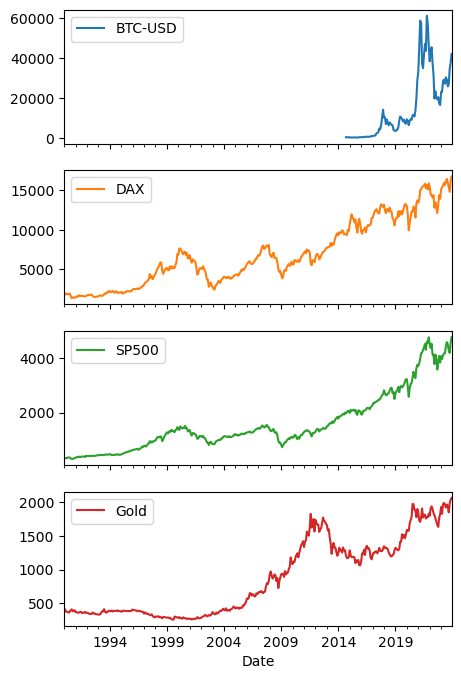

In [998]:
yf.pdr_override()
other_instruments = pdr.get_data_yahoo(["^GSPC", "^GDAXI", "BTC-USD"], start="1990-01-01", end="2023-12-31")
other_instruments = other_instruments.resample('M').last()
other_instruments = other_instruments['Close']
other_instruments = other_instruments.rename(columns={'^GSPC': 'SP500', 'WIG20.WA': 'WIG20', '^GDAXI': 'DAX'})
gold_historical_data = pd.read_csv(csv_path / 'xauusd.csv')
other_instruments = other_instruments.reset_index()
other_instruments = other_instruments.join(gold_historical_data['Close'])
other_instruments = other_instruments.rename(columns={'Close': 'Gold'})

#Set 'Date' as index
other_instruments.set_index("Date", inplace=True)
other_instruments.plot(figsize=(5,8), subplots=True)
plt.savefig(plots_path / 'szeregi_długie_wszystkie.pdf')

other_instruments.tail()

In [999]:
HPR_SP500 = (((other_instruments['SP500'].iloc[-1] - other_instruments['SP500'].iloc[0]) / other_instruments['SP500'].iloc[0]))
APR_SP500 = round(((HPR_SP500 + 1) ** (1/34)) - 1, 6)

HPR_DAX = (((other_instruments['DAX'].iloc[-1] - other_instruments['DAX'].iloc[0]) / other_instruments['DAX'].iloc[0]))
APR_DAX = round(((HPR_DAX + 1) ** (1/34)) - 1, 6)

HPR_Gold = (((other_instruments['Gold'].iloc[-1] - other_instruments['Gold'].iloc[0]) / other_instruments['Gold'].iloc[0]))
APR_Gold = round(((HPR_Gold + 1) ** (1/34)) - 1, 6)

HPR_BTC = ((other_instruments['BTC-USD'].iloc[-1] - other_instruments['BTC-USD'].iloc[300]) / other_instruments['BTC-USD'].iloc[300])
APR_BTC = round(((HPR_BTC + 1) ** (1/9)) - 1, 6)

APR_lego_1990 = round(df.loc[df['year'].isin(np.arange(1990, 2025, 1)), 'APR'].mean(), 6)

In [1000]:
print(f'APR for SP500: {APR_SP500}')
print(f'APR for DAX: {APR_DAX}')
print(f'APR for Gold: {APR_Gold}')
print(f'APR for BTC: {APR_BTC}')
print(f'APR for LEGO: {APR_lego_1990}')

APR for SP500: 0.081815
APR for DAX: 0.067441
APR for Gold: 0.048092
APR for BTC: 0.795414
APR for LEGO: 0.082779


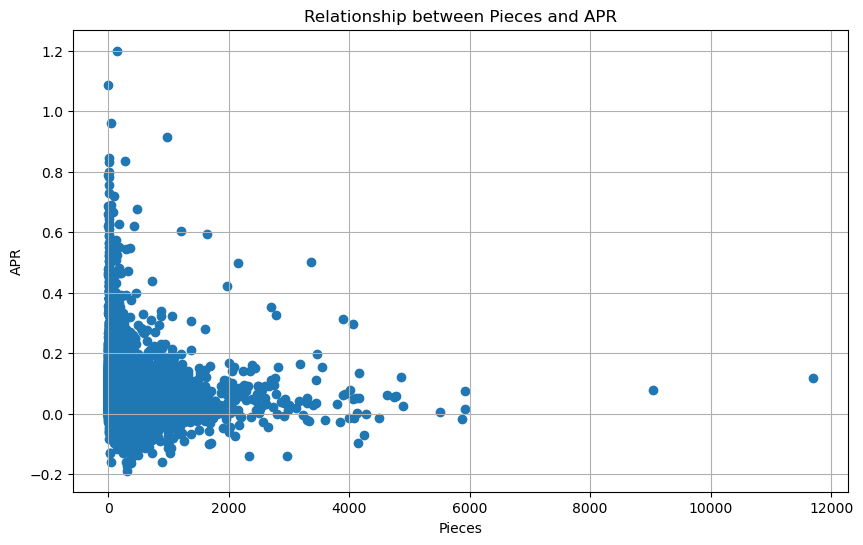

In [1001]:
plt.figure(figsize=(10, 6))
plt.scatter(df['pieces'], df['APR'])
plt.title('Relationship between Pieces and APR')
plt.xlabel('Pieces')
plt.ylabel('APR')
plt.grid(True)
plt.show()